# Constrained convex optimization

*Selected Topics in Mathematical Optimization: 2017-2018*

**Michiel Stock** ([email](michiel.stock@ugent.be))

![](Figures/logo.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from teachingtools import plot_contour, add_path

In [2]:
# suppress warnings
import warnings
warnings.filterwarnings("ignore")

## Equality constrained convex optimization

### Problem outline

We will start with convex optimization problems with linear equality constraints:

$$
\min_\mathbf{x} f(\mathbf{x}) \\
\text{subject to } A\mathbf{x}=\mathbf{b}
$$

where $f : \mathbb{R}^n \rightarrow \mathbb{R}$ is convex and twice continuously differentiable and $A\in \mathbb{R}^{p\times n}$ with a rank $p < n$.

The Lagrangian of this problem is

$$
L(\mathbf{x}, \boldsymbol{\nu}) = f(\mathbf{x}) + \boldsymbol{\nu}^\top(A\mathbf{x}-\mathbf{b})\,,
$$
with $\boldsymbol{\nu}\in\mathbb{R}^p$ the vector of Lagrange multipliers.

A point $\mathbf{x}^\star\in$ **dom** $f$ is optimal for the above optimization problem only if there is a $\boldsymbol{\nu}^\star\in\mathbb{R}^p$ such that:

$$
A\mathbf{x}^\star = \mathbf{b}, \qquad \nabla f(\mathbf{x}^\star) + A^\top\boldsymbol{\nu}^\star = 0\,.
$$

We will reuse the same toy examples from the previous chapter, but add an equality constraint to both.

- Simple quadratic problem:

$$
 \min_{\mathbf{x}} \frac{1}{2} (x_1^2 + 4 x_2^2)\\
 \text{subject to }  x_1 - 2x_2 = 3
$$

- A non-quadratic function:

$$
 \min_{\mathbf{x}}\log(e^{x_1 +3x_2-0.1}+e^{x_1 -3x_2-0.1}+e^{-x_1 -0.1})\\
 \text{subject to }  x_1 + 3x_2 = 0  
$$

In [3]:
from teachingtools import quadratic, grad_quadratic, hessian_quadratic
from teachingtools import nonquadratic, grad_nonquadratic, hessian_nonquadratic

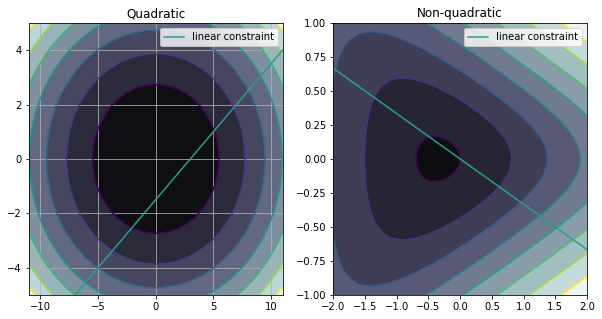

In [4]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
plot_contour(quadratic, (-11, 11), (-5, 5), ax1, [1.0, -2.0], 3)
ax1.set_title('Quadratic')
ax1.legend(loc=0)
plot_contour(nonquadratic, (-2, 2), (-1, 1), ax2, [1, 3], 0)
ax2.set_title('Non-quadratic')
ax2.legend(loc=0)
ax1.grid()

### Equality constrained convex quadratic optimization

Consider the following equality constrained convex optimization problem:

$$
\min_\mathbf{x}\frac{1}{2}\mathbf{x}^\top P \mathbf{x} + \mathbf{q}^\top \mathbf{x} + r  \\
\text{subject to }  A\mathbf{x}=\mathbf{b}
$$

where $P$ is symmetric.

The optimality conditions are
$$
A\mathbf{x}^\star = \mathbf{b}, \quad P\mathbf{x}^\star+\mathbf{q} +A^\top\boldsymbol{\nu}^\star=\mathbf{0}\,,
$$
which we can write as

$$
\begin{bmatrix}
P & A^\top \\
A & 0 \\
     \end{bmatrix}
     \begin{bmatrix}
\mathbf{x}^\star\\
\boldsymbol{\nu}^\star
     \end{bmatrix}
     =
     \begin{bmatrix}
-\mathbf{q} \\
\mathbf{b}
     \end{bmatrix}\,.
$$
Note that this is a block matrix.

> If $P$ is positive-definite, the linearly constrained quadratic minimization problem has an unique solution.

Solving this linear system gives both the constrained minimizer $\mathbf{x}^\star$ as well as the Lagrange multipliers.

**Assignment 1**

1. Complete the code to solve linearly constrained quadratic systems.
2. Use this code to solve the quadratic toy problem defined above.

In [ ]:
def solve_constrained_quadratic_problem(P, q, A, b):
    """
    Solve a linear constrained quadratic convex problem.

    Inputs:
        - P, q: quadratic and linear parameters of
                the linear function to be minimized
        - A, b: system of the linear constraints

    Outputs:
        - xstar: the exact minimizer
        - vstar: the optimal Lagrange multipliers
    """
    p, n = A.size  # size of the problem
    # complete this code
    # HINT: use np.linalg.solve and np.bmat
    solution = newtons_method(quadratic, np.array([[10.0], [1.0]]),grad_quadratic, hessian_quadratic, epsilon=1e-8, trace=False)
add_path(ax1, x_steps_q, red)
    xstar = solution[:n]
    vstar = solution[n:]
    return np.array(xstar), np.array(vstar)

In [ ]:
# complete the parameters

P = np.array([1,3])  #  2 x 2 array
A = np.array([1,3])  #  1 x 2 array
b = ...  # 1 x 1 array
q = ...  #  2 x 1 array

In [ ]:
xstar, vstar = solve_constrained_quadratic_problem(...  # complete

In [ ]:
print('Minimizer:')
print(xstar)

fig, ax = plt.subplots()
plot_contour(quadratic, (-11, 11), (-5, 5), ax, [1, -2], 3)
ax.scatter(xstar[0,0], xstar[1,0], 50, 'r', label='minimum')
ax.grid()
ax.legend(loc=0)

### Newton's method with equality constraints

To derive $\Delta \mathbf{x}_{nt}$ for the following equality constrained problem

$$
\min_\mathbf{x}  f(\mathbf{x}) \\
\text{subject to }  A\mathbf{x}=\mathbf{b}
$$

we apply a second-order Taylor approximation at the point $\mathbf{x}$, to obtain

$$
\min_\mathbf{x} \hat{f}(\mathbf{x} +\mathbf{v}) = f(\mathbf{x}) +\nabla f(\mathbf{x})^\top \mathbf{v}+ \frac{1}{2}\mathbf{v}^\top \nabla^2 f(\mathbf{x}) \mathbf{v} \\
\text{subject to } A(\mathbf{x}+\mathbf{v})=\mathbf{b}\,.
$$

Based on the solution of quadratic convex problems with linear constraints, the Newton $\Delta \mathbf{x}_{nt}$ step is characterized by

$$
\begin{bmatrix}
 \nabla^2 f(\mathbf{x})&  A^\top \\
A & 0 \\
     \end{bmatrix}
     \begin{bmatrix}
\Delta \mathbf{x}_{nt}\\
\mathbf{w}
     \end{bmatrix}
     =
     -\begin{bmatrix}
\nabla f(\mathbf{x}) \\
A\mathbf{x}-\mathbf{b}
     \end{bmatrix}
$$

- If the starting point $\mathbf{x}^{(0)}$ is chosen such that $A\mathbf{x}^{(0)}=\mathbf{b}$, the residual term vanishes and steps will remain in the feasible region. This is the **feasible start Newton method**.
- If we choose an arbitrary $\mathbf{x}^{(0)}\in$ **dom** $f$, not satisfying the constraints, this is the **infeasible start Newton method**. It will usually converge rapidly to the feasible region (check the final solution!).

Note that when we start at a feasible point, the residual vector $-(A\mathbf{x}-\mathbf{b})$ vanishes and the path will always remain in a feasible region. Otherwise we will converge to it.

In this chapter, we will use a fixed step size. For Newton's method this usually leads to only a few extra iterations compared to an adaptive step size.

>**input** starting point $\mathbf{x}\in$ **dom** $f$ (with $A\mathbf{x}=\mathbf{b}$ if using the feasible method), tolerance $\epsilon>0$.
>
>**repeat**
>
>>    1. Compute the Newton step $\Delta \mathbf{x}_{nt}$ and decrement $\lambda(\mathbf{x})$.
>>    2. *Stopping criterion*. **break** if $\lambda^2/2\leq \epsilon$.
>>    3. *Choose step size $t$*: either by line search or fixed $t$.
>>    4. *Update*. $\mathbf{x}:=\mathbf{x}+t \Delta \mathbf{x}_{nt}$.
>
>**output** $\mathbf{x}$

Again, the convergence can be monitored using the Newton decrement:

$$
\lambda^2(\mathbf{x}) = - \Delta \mathbf{x}_{nt}^\top \nabla f(\mathbf{x})\,.
$$

The algorithm terminates when

$$
\frac{\lambda(\mathbf{x})^2}{2} < \epsilon\,.
$$

The Newton decrement also indicates whether we are in or close to the feasible region.

**Assignment 2**

1. Complete the code for the linearly constrained Newton method.
2. Use this code to find the minimum of the non-quadratic toy problem, defined above (compare a feasible and infeasible start).


In [66]:
def backtracking_line_search(f, x0, Dx, grad_f, alpha=0.05, beta=0.6):
    '''
    Uses backtracking for finding the minimum over a line.
    Inputs:
        - f: function to be searched over a line
        - x0: initial point
        - Dx: direction to search
        - grad_f: gradient of f
        - alpha
        - beta
    Output:
        - t: suggested stepsize
    '''
    t = 1
    while f(x0+t*Dx) > f(x0) + alpha*t*np.sum(grad_f(x0)*Dx):
        t *= beta 
    return t

def linear_constrained_newton(f, x0, grad_f, hess_f, A, b, stepsize=0.25, epsilon=1e-3, trace=False):
    '''
    Newton's method for minimizing functions.
    Inputs:
        - f: function to be minimized
        - x0: starting point
        - grad_f: gradient of the function to be minimized
        - hess_f: hessian matrix of the function to be minimized
        - alpha: parameter for btls
        - beta: parameter for btls
        - nu: parameter to determine if the algorithm is converged
        - trace: (bool) store the path that is followed?
    Outputs:
        - xstar: the found minimum
        - x_steps: path in the domain that is followed (if trace=True)
        - f_steps: image of x_steps (if trace=True)
    '''
    x = x0  # initial value
    if trace: x_steps = [x.copy()]
    if trace: f_steps = [f(x0)]
    p, n = A.shape
    while True:
        print(np.bmat([[grad_f(x)],[A@x-b]]))
        Dx = - np.linalg.solve(np.bmat([[hess_f(x), A.transpose()], [A, np.zeros((p,p))]]) , np.bmat([[grad_f(x)],[A@x-b]]))
        
        Dx = Dx[:n]
        lambda_square = np.sum(grad_f(x)*-Dx)
        if lambda_square < epsilon:
            break  # converged
              
        x += stepsize*Dx
        if trace: x_steps.append(x.copy())
        if trace: f_steps.append(f(x))
    if trace: return x, x_steps, f_steps    
    else: return x

In [ ]:
def linear_constrained_newton(f, x0, grad_f,
              hess_f, A, b, stepsize=0.25, epsilon=1e-3,
              trace=False):
    '''
    Newton's method for minimizing functions with linear constraints.

    Inputs:
        - f: function to be minimized
        - x0: starting point (does not have to be feasible)
        - grad_f: gradient of the function to be minimized
        - hess_f: hessian matrix of the function to be minimized
        - A, b: linear constraints
        - stepsize: step size for each Newton step (fixed)
        - epsilon: parameter to determine if the algorithm is converged
        - trace: (bool) store the path that is followed?

    Outputs:
        - xstar: the found minimum
        - x_steps: path in the domain that is followed (if trace=True)
        - f_steps: image of x_steps (if trace=True)
    '''
    assert stepsize < 1 and stepsize > 0
    x = x0  # initial value
    p, n = A.shape
    if trace: x_steps = [x.copy()]
    if trace: f_steps = [f(x0)]
    while True:
        ddfx = hess_f(x)
        dfx = grad_f(x)
        
        if lambda_sq/2 < epsilon:
            break
        Dx, _ = solve_constrained_quadratic_problem(... # complete!
        newton_decrement = ...
        if ...  # stopping criterion
            break  # converged
        # perform step
        if trace: x_steps.append(x.copy())
        if trace: f_steps.append(f(x))
    if trace: return x, x_steps, f_steps    
    else: return x

In [63]:
# to complete

A = np.array([[1,3]]) #  1 x 2 array
b = np.array([[0]])#  1 x 1 array
x0 = np.array([[0.6], [-0.2]])  # feasible
#x0 = np.array([[0.6], [0.2]])  # unfeasible

In [67]:
xstar, x_steps, f_steps = linear_constrained_newton(nonquadratic, x0, grad_nonquadratic, hessian_nonquadratic, A, b, trace=True)  # complete

[[  7.74565747e-01]
 [ -1.42954465e+00]
 [ -1.11022302e-16]]


ValueError: shapes (2,1) and (2,1) not aligned: 1 (dim 1) != 2 (dim 0)

In [60]:
C = np.mat('3 ; 4')
D = np.mat('7 ; 8')

print(C.shape)
np.bmat([[C],[D]])

(2, 1)


matrix([[3],
        [4],
        [7],
        [8]])

In [40]:
%debug

> <ipython-input-22-0cdaa13f5d11>(41)linear_constrained_newton()
     39     p, n = A.shape
     40     while True:
---> 41         print(np.bmat([[grad_f(x)],[A@x-b]]))
     42         Dx = - np.linalg.solve(np.bmat([[hess_f(x), A.transpose()], [A, np.zeros((p,p))]]) , np.bmat([grad_f(x),A@x-b]))
     43 

ipdb> a@x-b
f = <function quadratic at 0x7f7d5aeeabf8>
x0 = array([[ 0.6],
       [-0.2]])
grad_f = <function grad_quadratic at 0x7f7d5aeeac80>
hess_f = <function hessian_quadratic at 0x7f7d5aeeaf28>
A = array([[ 1],
       [-2]])
b = array([[3]])
stepsize = 0.25
epsilon = 0.001
trace = True
ipdb> A@x-b
*** ValueError: shapes (2,1) and (2,1) not aligned: 1 (dim 1) != 2 (dim 0)
ipdb> b
ipdb> print(b)
[[3]]
ipdb> A @ x
*** ValueError: shapes (2,1) and (2,1) not aligned: 1 (dim 1) != 2 (dim 0)
ipdb> q


Minimizer:
[[ 0.6]
 [-0.2]]


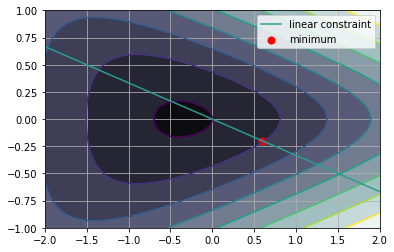

In [57]:
print('Minimizer:')
print(xstar)

fig, ax = plt.subplots()
plot_contour(nonquadratic, (-2, 2), (-1, 1), ax, [1, 3], 0)
add_path(ax=ax, x_steps=x_steps)
ax.scatter(xstar[0,0], xstar[1,0], 50, 'r', label='minimum')
ax.grid()
ax.legend(loc=0)

## References

- Boyd, S. and Vandenberghe, L., '*[Convex Optimization](https://web.stanford.edu/~boyd/cvxbook/bv_cvxbook.pdf)*'. Cambridge University Press (2004)
- Bishop, C., *Pattern Recognition and Machine Learning*. Springer (2006)